### Dataset Info
The dataset contains 26 letters (A-Z), handwritten images of size 28*28 pixels<br>
Each image is stored as Gray-level<br>
Dataset Link ---> [Dataset!](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format)

In [1]:
import numpy as np 
import pandas as pd 
import os,random
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import tensorflow.keras as ks
from keras import layers
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Activation,Conv2D,MaxPool2D,Dropout,BatchNormalization,GlobalAvgPool2D

2024-08-04 08:52:45.039670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 08:52:45.039822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 08:52:45.192639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
handwritten = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')
handwritten.shape

(372450, 785)

In [3]:
handwritten.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
handwritten['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

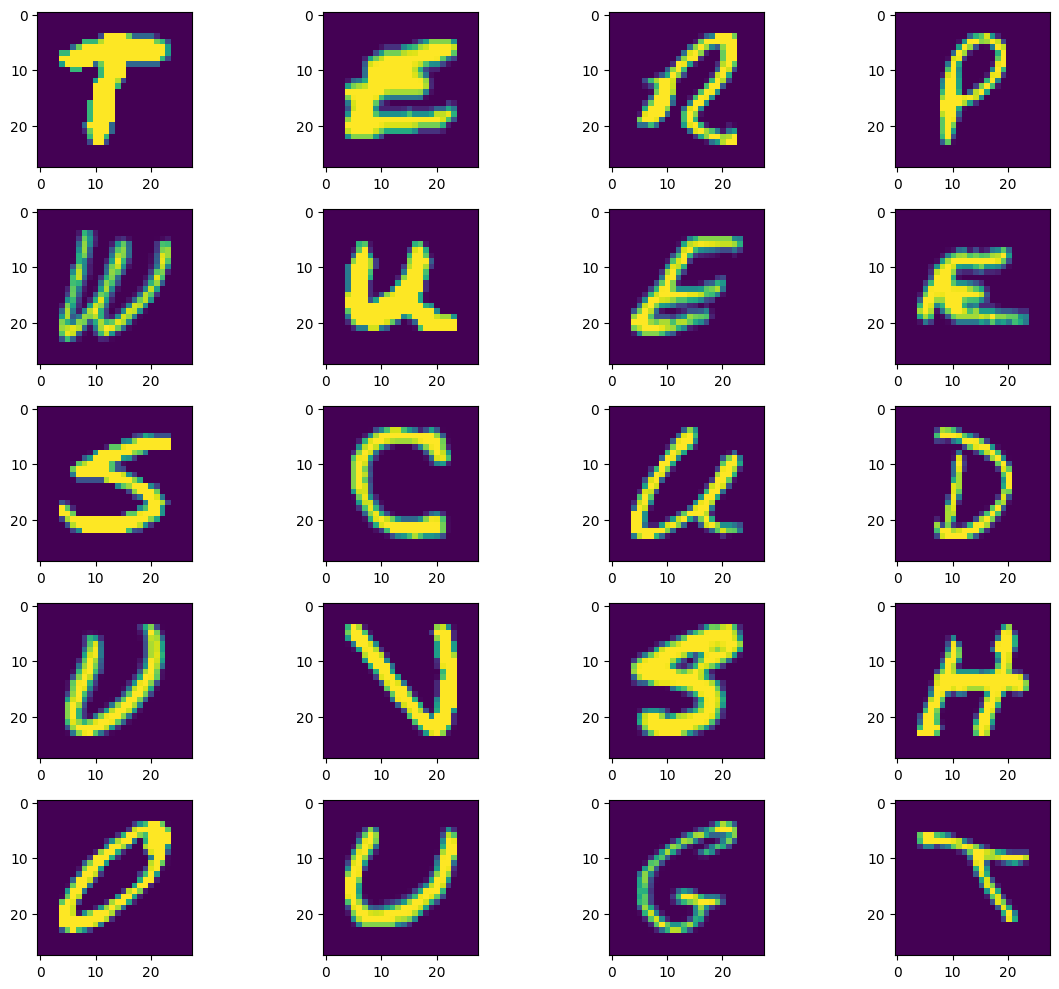

In [5]:
fig,axs = plt.subplots(5,4,figsize=(12,10))
ax = axs.ravel()
temp = handwritten.drop('0',axis=1).values
ran_val = random.sample(range(len(temp)),20)
for i,val in enumerate(ran_val):
    ax[i].imshow(temp[val].reshape(28,28))
    
plt.tight_layout()
plt.show()

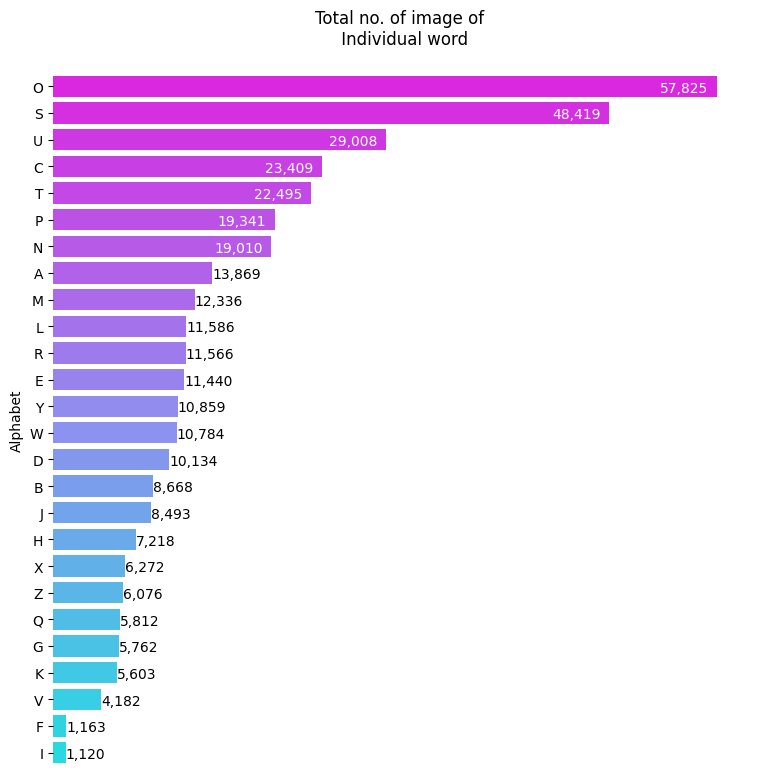

In [39]:
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T',
            'U','V','W','X','Y','Z']

def letter_name(x):
    return alphabets[x['label']]

class_count = handwritten['0'].value_counts().reset_index().rename(columns={'0':'label'})
class_count['label'] = class_count.apply(letter_name,axis=1)
fig,ax=plt.subplots(figsize=(9,9))
sns.barplot(class_count,y='label',x='count',palette='cool_r')
for j in ['right','left','top','bottom']:
    ax.spines[j].set_visible(False)
ax.set_xticks([])
for j in ax.patches:
    if j.get_width()>15000:
        ax.text(j.get_width()-5000,j.get_y()+0.6,'{:,d}'.format(int(j.get_width())),color='white')
    else:
        ax.text(j.get_width(),j.get_y()+0.6,'{:,d}'.format(int(j.get_width())))
ax.set_xlabel('')
ax.set_ylabel('Alphabet')
ax.set_title('Total no. of image of \n Individual word\n')

plt.show()

In [49]:
X = handwritten.drop('0',axis=1)
Y = handwritten['0']
X.shape , Y.shape

((372450, 784), (372450,))

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape 

((279337, 784), (93113, 784), (279337,), (93113,))

In [51]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

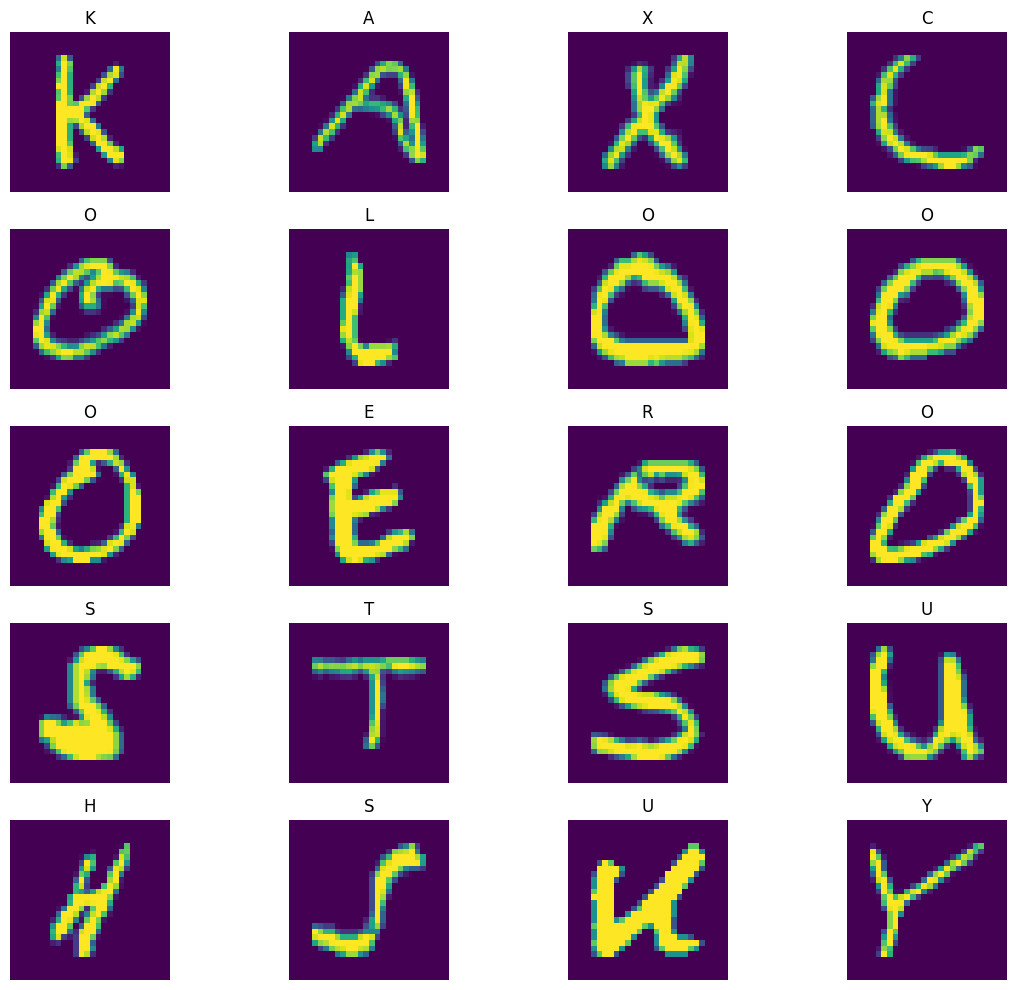

In [62]:
fig,axs = plt.subplots(5,4,figsize=(12,10))
ax = axs.ravel()
ran_val = random.sample(range(len(x_train)),20)
for i,val in enumerate(ran_val):
    ax[i].imshow(x_train[val].reshape(28,28))
    ax[i].set_title(alphabets[y_train.values[val]])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [55]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [56]:
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape 

((279337, 28, 28, 1), (93113, 28, 28, 1), (279337, 26), (93113, 26))

In [55]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPool2D(pool_size=(2, 2)))
cls.add(Dropout(0.5))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(26, activation='softmax'))

In [56]:
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
  51/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4179 - loss: 2.1092

I0000 00:00:1722521792.480573     718 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722521792.501296     718 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1397/1397 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.5033

W0000 00:00:1722521799.209201     720 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1397/1397 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8590 - loss: 0.5031 - val_accuracy: 0.9710 - val_loss: 0.1043
Epoch 2/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9687 - loss: 0.1105 - val_accuracy: 0.9791 - val_loss: 0.0737
Epoch 3/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9767 - loss: 0.0807 - val_accuracy: 0.9825 - val_loss: 0.0628
Epoch 4/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9803 - loss: 0.0664 - val_accuracy: 0.9856 - val_loss: 0.0510
Epoch 5/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9835 - loss: 0.0553 - val_accuracy: 0.9876 - val_loss: 0.0465
Epoch 6/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9846 - loss: 0.0503 - val_accuracy: 0.9874 - val_loss: 0.0468
Epoch 7/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9868 - loss: 0.0437 - val_accuracy: 0.9892 - val_loss: 0.0400
Epoch 8/20
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accura

In [57]:
cls.save_weights('handwritten6.weights.h5')